In [38]:
import pandas as pd
import numpy as np
train_df=pd.read_csv('../input/railofy-challenge/Railofy_training_data_for_model.csv')
test_df=pd.read_csv('../input/railofy-challenge/Railofy_testing_data_for_model.csv')
sub_df=pd.read_csv('../input/railofy-challenge/sample_submission.csv')

In [39]:
train_df.head()

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,...,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target
0,88315053602,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,...,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0
1,88315053603,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,...,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0
2,88314793081,GN,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,...,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0
3,88312760631,GN,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,...,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,1
4,88312449843,GN,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,...,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0


In [40]:
train_df=train_df.drop(columns='pk',axis=1)
train_df.head()

,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,...,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target
0,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,...,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0
1,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,...,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0
2,GN,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,...,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0
3,GN,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,0.314147,...,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,1
4,GN,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,0.253333,...,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
x=train_df.drop(columns='target',axis=1)
y=train_df['target']

In [43]:
x

,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,...,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3
0,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,0.204678,...,0.919474,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0
1,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,0.216374,...,0.919474,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0
2,GN,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,0.089888,...,0.003487,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0
3,GN,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,0.314147,...,0.148338,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0
4,GN,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,0.253333,...,2.129082,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36770,RL,0.409484,0.596791,1.111341,0.717595,0.842451,0.678571,1,0.023090,0.040000,...,1.215422,1.257384,2.217063,0.234643,0.636501,3.971113,1,1,0,0
36771,RL,0.409484,0.596791,1.111341,0.717595,0.842451,0.678571,1,0.031423,0.060000,...,1.215422,1.747777,2.454078,0.233838,0.636501,4.120546,1,1,0,0
36772,RL,0.450433,2.821902,1.248016,0.843047,0.620754,0.583333,1,0.006132,0.527273,...,2.042082,1.141838,0.907823,0.252552,0.550830,1.507716,0,1,0,0
36773,RL,0.450433,2.821902,1.248016,0.843047,0.620754,0.583333,1,0.022761,0.545455,...,2.042082,1.612651,1.436162,0.255523,0.550830,1.652504,0,1,0,0


In [44]:
y

0        0
1        0
2        0
3        1
4        0
        ..
36770    0
36771    0
36772    1
36773    1
36774    0
Name: target, Length: 36775, dtype: int64

In [45]:
type(x)

pandas.core.frame.DataFrame

In [55]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 849.9 kB/s eta 0:00:0000:0100:01


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [62]:
from flaml import AutoML
automl = AutoML()
automl.fit(x_train, y_train, task="classification",metric='ndcg',time_budget=900)

[flaml.automl: 07-17 11:30:15] {2427} INFO - task = classification
[flaml.automl: 07-17 11:30:15] {2429} INFO - Data split method: stratified
[flaml.automl: 07-17 11:30:15] {2432} INFO - Evaluation method: cv
[flaml.automl: 07-17 11:30:15] {2551} INFO - Minimizing error metric: 1-ndcg
[flaml.automl: 07-17 11:30:16] {2691} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 07-17 11:30:16] {2993} INFO - iteration 0, current learner lgbm
[flaml.automl: 07-17 11:30:17] {3127} INFO - Estimated sufficient time budget=8689s. Estimated necessary time budget=213s.
[flaml.automl: 07-17 11:30:17] {3179} INFO -  at 1.2s,	estimator lgbm's best error=0.1601,	best estimator lgbm's best error=0.1601
[flaml.automl: 07-17 11:30:17] {2993} INFO - iteration 1, current learner lgbm
[flaml.automl: 07-17 11:30:17] {3179} INFO -  at 2.0s,	estimator lgbm's best error=0.1601,	best estimator lgbm's best error=0.1601
[flaml.automl

In [63]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best ndcg on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 575, 'num_leaves': 118, 'min_child_samples': 2, 'learning_rate': 0.1632300183443432, 'log_max_bin': 8, 'colsample_bytree': 0.43638522659806045, 'reg_alpha': 0.02046640007359354, 'reg_lambda': 0.003219796202368643}
Best ndcg on validation data: 0.9781
Training duration of best run: 5.949 s


In [64]:
y_pred=automl.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [68]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5089
           1       0.93      0.89      0.91      2266

    accuracy                           0.94      7355
   macro avg       0.94      0.93      0.93      7355
weighted avg       0.94      0.94      0.94      7355



In [71]:
accuracy_score(y_test,y_pred)

0.9438477226376615

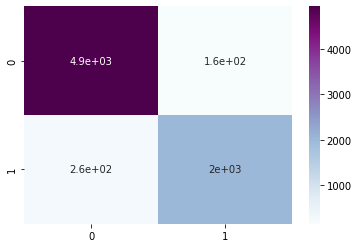

In [70]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='BuPu')
plt.show()

In [73]:
test=test_df.copy()
test

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,...,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3
0,8831606085,GN,0.065517,0.041589,1.614476,1.000000,1.773582,0.975610,1,0.008326,...,0.058562,0.705277,1.457012,0.280196,1.335478,1.692308,0,0,0,1
1,8831561565,GN,2.710786,1.658815,0.927683,0.836028,0.665093,0.681818,1,0.013590,...,0.119819,-0.323278,-0.195543,0.276128,-0.537617,1.629686,0,1,0,0
2,8831539811,GN,3.365960,1.514607,1.546139,0.961232,1.418866,0.888889,1,0.008322,...,0.200964,0.305956,0.328951,0.276128,-0.093347,1.116554,0,1,0,0
3,8831313791,GN,2.342250,1.277346,0.990041,1.000000,0.842451,0.950000,1,0.007728,...,1.082519,0.446952,0.494185,0.271758,0.069792,1.442885,0,1,0,0
4,8831070109,GN,0.139225,0.054502,1.575182,0.817376,2.571694,0.773333,1,0.024999,...,1.975081,3.847262,3.497138,0.267730,1.296174,1.372434,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,2139056922,RL,0.262070,0.605343,0.929392,0.450331,0.487735,0.523810,1,0.010740,...,0.980502,0.941921,1.684810,0.250342,0.855013,0.000000,1,0,1,0
3843,2138303681,RL,1.588799,1.854344,0.668854,0.812241,0.354716,0.533333,0,0.000000,...,0.417453,5.000000,5.000000,0.254550,0.325570,0.617527,0,0,0,0
3844,2138033785,RL,0.196552,0.778921,1.143801,0.895053,0.443396,0.714286,1,0.023755,...,2.093390,-0.335731,0.800839,0.269082,-0.322042,5.000000,0,0,1,0
3845,2137893302,RL,0.163794,1.591849,0.520220,0.819650,0.620754,0.777778,1,0.001722,...,0.465279,-0.148550,0.013804,0.254550,0.124584,0.000000,0,1,0,0


In [74]:
test_df.head()

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,...,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3
0,8831606085,GN,0.065517,0.041589,1.614476,1.000000,1.773582,0.975610,1,0.008326,...,0.058562,0.705277,1.457012,0.280196,1.335478,1.692308,0,0,0,1
1,8831561565,GN,2.710786,1.658815,0.927683,0.836028,0.665093,0.681818,1,0.013590,...,0.119819,-0.323278,-0.195543,0.276128,-0.537617,1.629686,0,1,0,0
2,8831539811,GN,3.365960,1.514607,1.546139,0.961232,1.418866,0.888889,1,0.008322,...,0.200964,0.305956,0.328951,0.276128,-0.093347,1.116554,0,1,0,0
3,8831313791,GN,2.342250,1.277346,0.990041,1.000000,0.842451,0.950000,1,0.007728,...,1.082519,0.446952,0.494185,0.271758,0.069792,1.442885,0,1,0,0
4,8831070109,GN,0.139225,0.054502,1.575182,0.817376,2.571694,0.773333,1,0.024999,...,1.975081,3.847262,3.497138,0.267730,1.296174,1.372434,0,0,1,0


In [75]:
test_df=test_df.drop(columns='pk',axis=1)
test_df.head(1)

,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,CURP,...,SCRA,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3
0,GN,0.065517,0.041589,1.614476,1.0,1.773582,0.97561,1,0.008326,0.375,...,0.058562,0.705277,1.457012,0.280196,1.335478,1.692308,0,0,0,1


In [77]:
preds1=automl.predict(test_df)
preds1

array([0, 0, 1, ..., 0, 0, 0])

In [78]:
sub1=pd.DataFrame({'pk':test['pk'],'target':preds1})
sub1

,pk,target
0,8831606085,0
1,8831561565,0
2,8831539811,1
3,8831313791,0
4,8831070109,0
...,...,...
3842,2139056922,0
3843,2138303681,1
3844,2138033785,0
3845,2137893302,0


In [79]:
sub1.to_csv('indian_railway_2.csv',index=None)

In [87]:
preds2 = automl.predict_proba(test_df)[:,0]
preds2

array([0.87138043, 0.99983984, 0.42906757, ..., 0.83648216, 0.51217317,
       0.99912405])

In [88]:
sub2=pd.DataFrame({'pk':test['pk'],'target':preds2})
sub2

,pk,target
0,8831606085,0.871380
1,8831561565,0.999840
2,8831539811,0.429068
3,8831313791,0.728931
4,8831070109,0.874295
...,...,...
3842,2139056922,0.959223
3843,2138303681,0.050917
3844,2138033785,0.836482
3845,2137893302,0.512173


In [97]:
sub2.describe().round(3)

,pk,target
count,3.847000e+03,3847.000
mean,5.672600e+09,0.717
std,2.488810e+09,0.396
min,2.119837e+09,0.000
25%,2.720717e+09,0.360
50%,6.258538e+09,0.983
75%,8.342369e+09,1.000
max,8.831606e+09,1.000


In [91]:
sub2.to_csv('indian_railway_3.csv',index=None)

In [92]:
preds3 = automl.predict_proba(test_df)[:,1]
preds3

array([1.28619569e-01, 1.60163616e-04, 5.70932432e-01, ...,
       1.63517844e-01, 4.87826832e-01, 8.75946078e-04])

In [124]:
preds3=np.where(preds3>0.01,1,0)
preds3

array([0, 0, 1, ..., 0, 0, 0])

In [125]:
sub3=pd.DataFrame({'pk':test['pk'],'target':preds3})
sub3

,pk,target
0,8831606085,0
1,8831561565,0
2,8831539811,1
3,8831313791,0
4,8831070109,0
...,...,...
3842,2139056922,0
3843,2138303681,1
3844,2138033785,0
3845,2137893302,0


In [126]:
sub3['target'].value_counts()

0    2779
1    1068
Name: target, dtype: int64

In [107]:
sub3.describe().round(3)

,pk,target
count,3.847000e+03,3847.000
mean,5.672600e+09,0.278
std,2.488810e+09,0.448
min,2.119837e+09,0.000
25%,2.720717e+09,0.000
50%,6.258538e+09,0.000
75%,8.342369e+09,1.000
max,8.831606e+09,1.000


In [108]:
sub3.to_csv('indian_railway_5.csv',index=None)